In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

2406


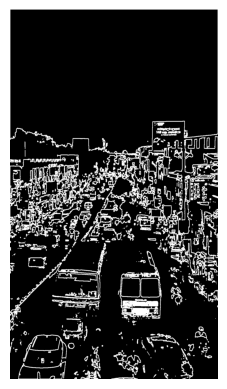

In [25]:
def contours_detector(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    blank = np.zeros(img.shape[:2], dtype='uint8')

    ret, thresh = cv.threshold(gray, 125, 255, cv.THRESH_BINARY)

    contours, hierarchy = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
    count = len(contours)

    cv.drawContours(blank, contours, -1, (255), thickness=2)
    blank = cv.dilate(blank, (3,3), iterations=1)

    return blank, count

image = cv.imread('Images\\02\\2.jpg')
blank, count = contours_detector(image)
print(count)

plt.imshow(blank, cmap='gray')
plt.axis('off')
plt.show()

In [29]:
min_list = []
for f in os.listdir('Images'):
    f_path = os.path.join('Images', f)
    if os.path.isdir(f_path):
        min_count = []
        for l in os.listdir(f_path):
            l_path = os.path.join(f_path, l)

            image = cv.imread(l_path)
            blank, count = contours_detector(image)
            min_count.append(count)
        min_list.append(np.min(min_count))

print(min_list)
            

[2726, 2245, 1486, 748, 1147, 1162, 1336, 322, 1229, 2164, 560, 483, 710]


In [37]:
video_list = []
for i, f in enumerate(os.listdir('Images')):
    f_path = os.path.join('Images', f)
    if os.path.isdir(f_path):
        vehicle_area = []
        for l in os.listdir(f_path):
            l_path = os.path.join(f_path, l)

            image = cv.imread(l_path)
            blank, count = contours_detector(image)

            vehicle_area.append(count - min_list[i])
        video_list.append(vehicle_area)

print(video_list)
            

[[933, 1312, 1419, 1061, 843, 774, 151, 271, 160, 0, 123, 162, 710, 143, 856, 1067, 1258, 1263, 1399, 1742, 1581], [536, 379, 299, 367, 297, 543, 224, 197, 390, 148, 61, 0, 161, 150, 200, 233, 323, 318, 279, 193, 243], [9, 119, 196, 355, 488, 445, 227, 284, 158, 52, 115, 257, 40, 156, 160, 207, 131, 83, 188, 0], [1605, 1171, 1271, 1097, 639, 270, 54, 0, 217, 359, 298, 822, 1165, 959, 1257, 1257, 1207, 1248, 1035, 1342], [616, 452, 789, 471, 427, 430, 213, 112, 148, 47, 0, 122, 496, 585, 615, 614, 725, 993, 781, 814], [98, 661, 314, 318, 429, 398, 367, 538, 961, 729, 477, 71, 741, 0, 874, 409, 632, 341, 567, 156], [602, 352, 311, 281, 307, 423, 229, 118, 182, 0, 27, 24, 290, 327, 330, 370, 425, 394, 286, 316], [983, 453, 398, 511, 530, 601, 647, 392, 614, 162, 365, 141, 0, 57, 236, 207, 323, 392, 538, 513], [488, 81, 510, 711, 531, 643, 833, 530, 946, 360, 621, 363, 39, 131, 237, 0, 307, 511, 429, 448], [1026, 871, 745, 567, 476, 480, 327, 287, 191, 53, 187, 0, 921, 617, 923, 836, 1100,